### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Read Dataset

In [2]:
df_fruit = pd.read_excel('fruit.xlsx') #membaca dataset fruit.xlsx
df_fruit.head() #menampilkan 5 data pertama

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange


In [3]:
df_fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [4]:
df_fruit.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [5]:
pd.unique(df_fruit['name'])

array(['orange', 'grapefruit'], dtype=object)

In [6]:
df_fruit['name'].value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

### Label Encoder

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_fruit['name'] = le.fit_transform(df_fruit['name'])
df_fruit['name'].value_counts()

name
1    5000
0    5000
Name: count, dtype: int64

### Split Independent dan Dependent Variabel

In [12]:
x = df_fruit.drop('name', axis=1) # Menghapus kolom name selainnya akan menjadi variabel x
y = df_fruit['name'] # Mengambil kolom name menjadi variabel y

### Fitur Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.fit_transform(x)

### Split Train Test

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Klasifikasi ID3

In [16]:
from sklearn.tree import DecisionTreeClassifier

### Entropy

In [17]:
entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Prediksi

In [18]:
y_pred = entropy.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

### Akurasi dan Evaluasi

In [19]:
from sklearn.metrics import accuracy_score

print("Skor Akurasi adalah :", accuracy_score(y_test, y_pred))

Skor Akurasi adalah : 0.8835


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1012
           1       0.90      0.85      0.88       988

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



### Pohon

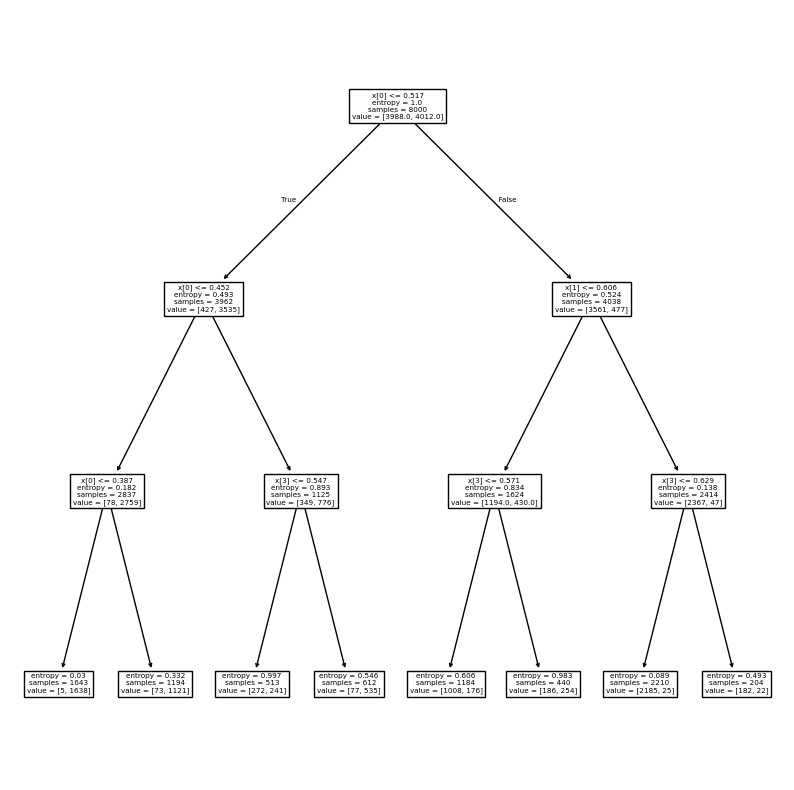

In [21]:
plt.figure(figsize=(10,10))
from sklearn import tree
tree.plot_tree(entropy.fit(x_train, y_train))   
plt.show()

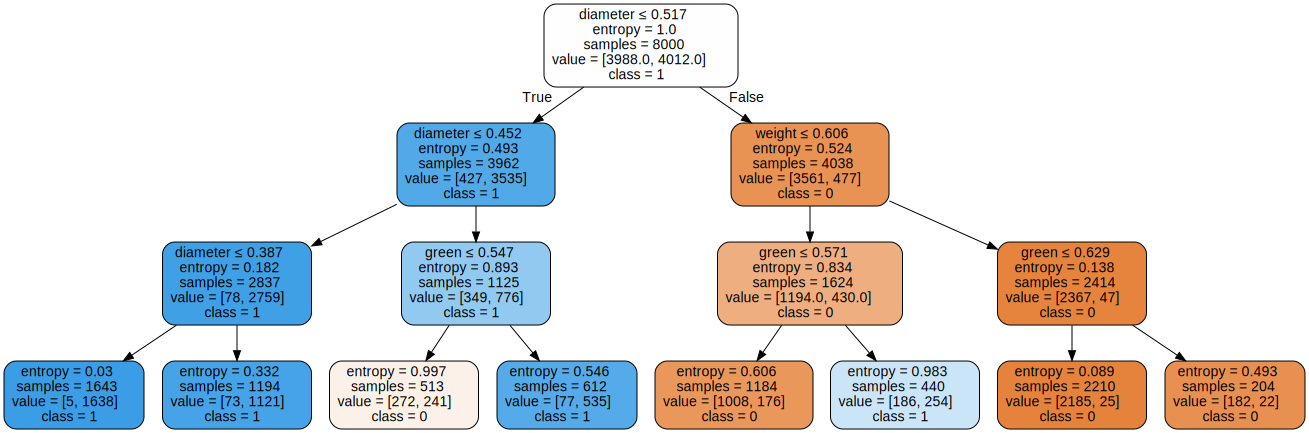

In [22]:
import graphviz
dot_data = tree.export_graphviz(entropy, out_file=None, feature_names=['diameter', 'weight', 'red', 'green', 'blue'], class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Klasifikasi Data Baru

In [23]:
new_fruit = [[9, 174, 154, 20, 78]] # Memasukkan data baru
entropy.predict(new_fruit) # Melakukan prediksi
print(entropy.predict(new_fruit)) # Melakukan prediksi

[0]


### Model

In [24]:
import pickle
pickle.dump(entropy, open('fruit_id3.pkl', 'wb'))